In [2]:
##download the data for train users 
import zipfile
import requests
import StringIO
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import datetime
import pandas as pd
os.chdir('/home/aplstudent/Max_Dickinson')

In [5]:
data = pd.read_csv('train_users_2.csv')
testdata = pd.read_csv('test_users.csv')

In [36]:
data.isnull()

In [8]:
##create visualizations of the data, perform an exploratory data anylasis
##clean up the data , create three columns for month./year / date created
##create classifier to predict whether people will make a booking or not
data.info() ##except for the date_first_booking and age this data looks relativly complete

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 27.7+ MB


In [40]:
data['date_account_created'][1][8:11] #gets the year


'25'

In [5]:
import datetime
datetime.date(data['date_account_created'][1])

TypeError: an integer is required

In [29]:
datetime.date(2011)

TypeError: Required argument 'month' (pos 2) not found

In [32]:
def getyear(x):
    if type(x) == float:
        return -1
    else :
        return int(x[0:4])
def getmonth(x):
    if type(x) == float:
        return -1
    else :
        return int(x[5:7])
def getday(x):
    if type(x) == float:
        return -1
    else :
        return int(x[8:11])
def getorder(x):
    return( (x[0:4],x[5:7],x[8:11]) )
def getdate(x):
    return datetime.date(x).toordinal()
data['date_account_created2'] = data['date_account_created'].apply(getorder)
data['year_created'] = data['date_account_created'].apply(getyear)
data['month_created'] = data['date_account_created'].apply(getmonth)
data['date_created'] = data['date_account_created'].apply(getday)
data['year_booked'] = data['date_first_booking'].apply(getyear)
data['month_booked'] = data['date_first_booking'].apply(getmonth)
data['day_booked'] = data['date_first_booking'].apply(getday)

In [33]:
data['date_account_created'].apply(getdate)

KeyError: 'date_account_created3'

In [34]:
data['year_created'] = data['date_account_created'].apply(getyear)
data['month_created'] = data['date_account_created'].apply(getmonth)
data['date_created'] = data['date_account_created'].apply(getday)
data['year_booked'] = data['date_first_booking'].apply(getyear)
data['month_booked'] = data['date_first_booking'].apply(getmonth)
data['day_booked'] = data['date_first_booking'].apply(getday)

In [35]:
data.axes

[Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             213441, 213442, 213443, 213444, 213445, 213446, 213447, 213448,
             213449, 213450],
            dtype='int64', length=213451),
 Index([u'id', u'date_account_created', u'timestamp_first_active',
        u'date_first_booking', u'gender', u'age', u'signup_method',
        u'signup_flow', u'language', u'affiliate_channel',
        u'affiliate_provider', u'first_affiliate_tracked', u'signup_app',
        u'first_device_type', u'first_browser', u'country_destination',
        u'date_account_created2', u'year_created', u'month_created',
        u'date_created', u'year_booked', u'month_booked', u'day_booked'],
       dtype='object')]

KeyError: 'date_booked'

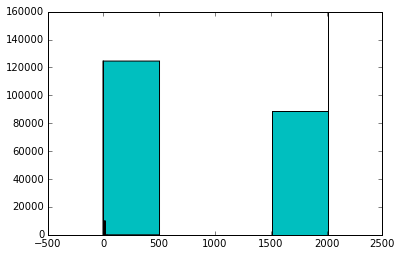

In [93]:
##good, but how do i get the dates to display as dates, using
plt.hist(data['year_created'] , bins = 4)
plt.hist(data['month_created'] , bins = 12)
plt.hist(data['date_created'] , bins = 30)
plt.hist(data['year_booked'] , bins = 4)
plt.hist(data['month_booked'] , bins = 12)
plt.hist(data['day_booked'] , bins = 30)

(array([ 124543.,       0.,       0.,   88908.]),
 array([ -1.00000000e+00,   5.03000000e+02,   1.00700000e+03,
          1.51100000e+03,   2.01500000e+03]),
 <a list of 4 Patch objects>)

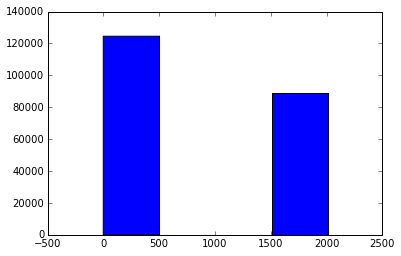

In [1]:
plt.hist(data['year_booked'] , bins = 4)
plt.hist(data['month_booked'] , bins = 12)
plt.hist(data['day_booked'] , bins = 30)

NameError: name 'plt' is not defined

In [ ]:
ohe = pd.get_dummies(data[['gender' , 'signup_method', 'signup_flow' , 'language' , 'affiliate_channel' , 'affiliate_provider' , 'first_affiliate_tracked', 'signup_app', 'first_device_type' , 'first_browser' ]])
ohe.axes

In [ ]:
svc = SVC()
svc.fit(ohe, data['country_destination'])

In [6]:
def dayssince(x):
    import matplotlib.dates as dates
    return dates.datestr2num(x)
numscreated = data['date_account_created'].apply(dayssince)
numbooked = data['date_first_booking'].dropna().apply(dayssince)

In [9]:
both = pd.concat((numscreated, numbooked) , axis = 1)
both = both.fillna(0)

In [ ]:
gen = pd.get_dummies(data['gender'])
both1 = pd.concat(both,gender)
age = data['age']
both2 = pd.concat(age , both1)

In [11]:
len(both)

213451

In [12]:
train = both[0:150000]
valid = both[150000::]

In [16]:
train_y = data.loc[1:150000, 'country_destination']
valid_y = data.loc[150000::, 'country_destination']

In [ ]:
svc = SVC()
svc.fit(train , train_y).score(valid,valid_y)